# Assignment 3 - Supervised Learning

## *Derek Lee Wales*
Netid: xxx

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWERS**
#### Latex Conversion: https://www.codecogs.com/latex/eqneditor.php

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

$p(y|x) = \prod_{i =1}^{N} \sigma(w^txi)^yi [1-\sigma(w^txi)]^{1-yi}$

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

$ln[L(p)] = ln(p) \sum_{i = 1}^{N} xi + ln(1-p)[N-\sum_{i = 1}^{N} - xi]$

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

$x^{i + 1} = x^{i} + \eta\nu $

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?
 
##### Sources: https://stackoverflow.com/questions/19064772/visualization-of-scatter-plots-with-overlapping-points-in-matplotlib, https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece

In [1]:
# Part E: 
import pandas as pd
import numpy as np
from numpy import genfromtxt   
import math

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_curve               
from sklearn.metrics import precision_recall_curve  
import sklearn.metrics as metrics                  
from sklearn.metrics import auc        
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression       
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from plotnine import *

from mnist import MNIST

import warnings
warnings.filterwarnings('ignore', module='plotnine')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)  
#warnings.filterwarnings("ignore", category=ConvergenceWarning)

def plot_roc(labels, prediction_scores):
    '''
    Creates a plot of the Recieving Opering Characteristics (ROC) Curve
    using the labels and predictions generated by the classifier.
    AOC is the Area under the curve.
    '''
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.figure(figsize = (12,8))
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC for Logistic Regression')
    plt.tight_layout()
    plt.show()


Part E:


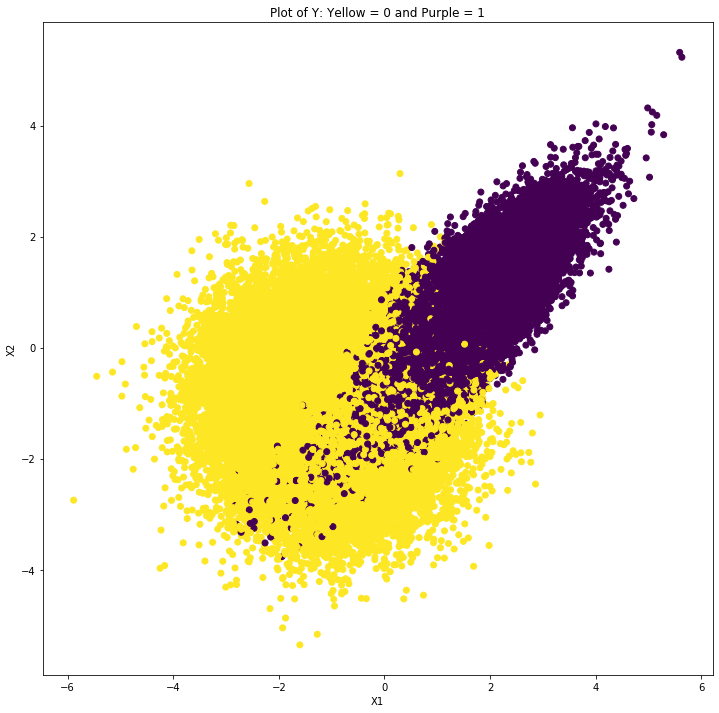


Part F:
This data does not require pre-processing because both isna() and describe() show no missing data and balanced variables. So no pre processing is required.
However such much of the data overlaps logistic regression will be less effective


In [2]:
print("\nPart E:")
q1_df = pd.read_csv('_data\\A3_Q1_data.csv')

# lables = [q1_df['x1'],q1_df['x2']]

plt.figure(figsize=(12,12))
plt.scatter(x = 'x1' , y = 'x2', c = 'y', data = q1_df)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot of Y: Yellow = 0 and Purple = 1')
plt.show()

print("\nPart F:")
print("This data does not require pre-processing because both isna() and describe() show no missing data and balanced variables. So no pre processing is required.")
print("However such much of the data overlaps logistic regression will be less effective")

In [3]:
##########
# Part G #
##########

# Converts X to a normalize function based on X's mean and standard deviation
def normalizeAndIntercepts(x):
    x_ = (x - x.mean(axis=0)) / x.std(axis=0)
    return np.concatenate( ( np.tile(np.matrix("1") ,(x.shape[0],1) ),x_) , 1 )

##############
# Part H - J #
##############

# A class to hold all of the functions required to make a Logisitic Regression work
class LogisticRegression(object):
    def __init__(self, weights,learningRate=0.05,earlyStopping=10^-6):
        self.outputLayerSize = 1
        self.inputLayerSize = 2
        self.learningRate = learningRate
        self.eS = earlyStopping
        self.W = weights

# utlizing the sigmoid function for predictions
    def predict(self,X):
        self.z1 = np.dot(X,self.W)
        return self.sigmoid(self.z1)

# This is the logistic 
    def sigmoid(self,z):
        return np.exp(z)/(1+np.exp(z))
    
# Creates a cost function based on the loss between Y and the predicted Y
    def costFunction(self,X,y):
        yHat = self.predict(X)
        N = X.shape[0]
        cost = - np.dot(y.T , np.log(yHat)) - np.dot( (1-y).T ,np.log((1-yHat)) )
        return cost / N

# define the rate at which
    def gradient(self,X,y):        
        yHat = self.predict(X)
        N = X.shape[0]
        gradient = -(1/N)*( np.dot( X.T,(yHat-y)) )
        return gradient
    
# Runs the Gradient descent and Cost functions on the training data in order to determine cost per epoch
    def train(self,X,y,epochs = 10,lr = 0.01, xTest = None, yTest = None):
        self.learningRate = lr
        costs = []
        test_costs = []
        for i in range(epochs):        
            cost1 = self.costFunction(X,y) # Calculating cost function
            costs.append([i,float(cost1)])
            
            try:
                test_cost = self.costFunction(xTest,yTest)
                test_costs.append([i,float(test_cost)])
            except TypeError: pass
            currentW = self.W
            gradient = self.gradient(X,y)
            self.W += np.multiply( gradient, self.learningRate)
            # If the difference in the old weight and the current weight is less than 10^-6 then stop the descent
            if np.linalg.norm(self.W, ord=2) - np.linalg.norm(currentW, ord=2) < self.eS:
                break
        return costs, test_costs
 
 # Plots the rates of each of the cost per epoch at each of the pre defined learning rates
def plotCosts(costs1, costs2, costs3):
    costs1 = np.array(costs1)             # Convert the cost given in fit to a np array.   
    costs2 = np.array(costs2)             # Convert the cost given in fit to a np array.
    costs3 = np.array(costs3)             # Convert the cost given in fit to a np array.
    plt.figure(figsize=(12, 12))          # defines the plot size
    plt.title("Cost over Epochs where Learning Rate")
    plt.plot(costs1[:,0], costs1[:,1], c='b',label="Training Cost at rate 0.01")
    plt.plot(costs2[:,0], costs2[:,1], c='r',label="Training Cost at rate 0.1")
    plt.plot(costs3[:,0], costs3[:,1], c='g',label="Training Cost at rate 1")
    plt.xlabel("Epochs")                  # X Axis Label
    plt.ylabel("Cost")                    # Y Axis Label
    plt.legend(loc='upper right')         # Places the legend in the upper right of the plot
    plt.show()                            # 
    pass

# Creates a 
def random_weights():
    weights = np.random.rand(3,1)
    return weights


Part K:



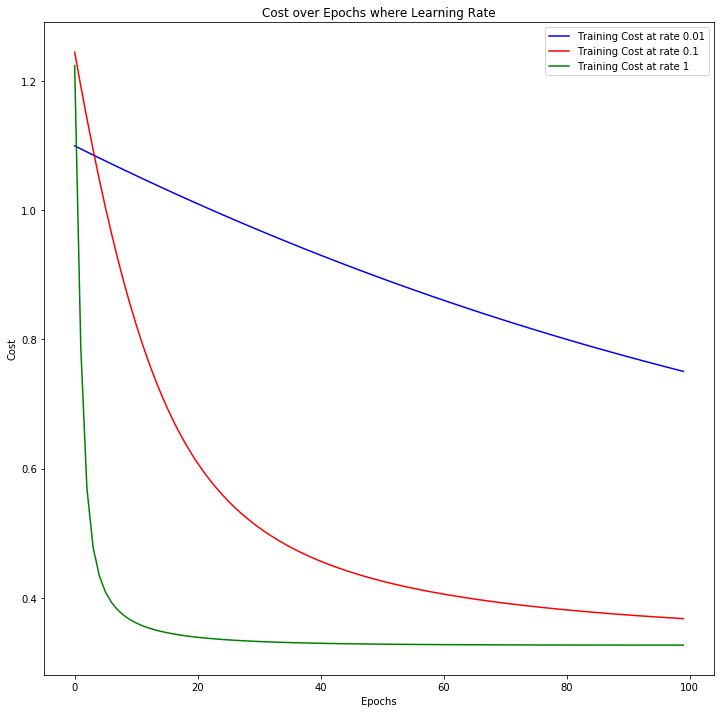


The learning rate determines the rate at which the gradient descent decreases. The cost reduces as the learning rate increases
As such, I will choose a training rate of 0.1 for the remainder of the problem. As a higher rate will fluctuate too much, and a
lower rate will take a substantially longer time to reach the minimum.


In [4]:
# Loading the data
data = genfromtxt("_data\A3_Q1_data.csv",delimiter=",",skip_header=1)
#data = q1_df
y = data[:,2:]
x = data[:,:2]

idxs = np.arange(len(data))
np.random.shuffle(idxs)
x = x[idxs]
y = y[idxs]

# (i) dividing data into training and test set, where training is 70% and test is 30%
x_train = x[:70000,:]
y_train = y[:70000,:]
x_train = normalizeAndIntercepts(x_train)

x_test = x[70000:,:]
y_test = y[70000:,:]
x_test = normalizeAndIntercepts(x_test)

##########
# Part K #
##########

# Train and plot models at three different Learning rates.

print("\nPart K:\n")

# Learning rate = 0.01
weights = random_weights()
model = LogisticRegression(weights)
costs1_, test_costs1_ = model.train(x_train, y_train, epochs = 100, lr = 0.01, xTest = x_test, yTest = y_test)

# Learning rate = 0.1
weights = random_weights()
model = LogisticRegression(weights)
costs2_, test_costs2_ = model.train(x_train, y_train, epochs = 100, lr = 0.1, xTest = x_test, yTest = y_test)

# Learning rate = 1
weights = random_weights()
model = LogisticRegression(weights)
costs3_, test_costs3_ = model.train(x_train, y_train, epochs = 100, lr = 1, xTest = x_test, yTest = y_test)

# Plot the costs
plotCosts(costs1_, costs2_, costs3_)

print("\nThe learning rate determines the rate at which the gradient descent decreases. The cost reduces as the learning rate increases")
print("As such, I will choose a training rate of 0.1 for the remainder of the problem. As a higher rate will fluctuate too much, and a")
print("lower rate will take a substantially longer time to reach the minimum.")


Part L:



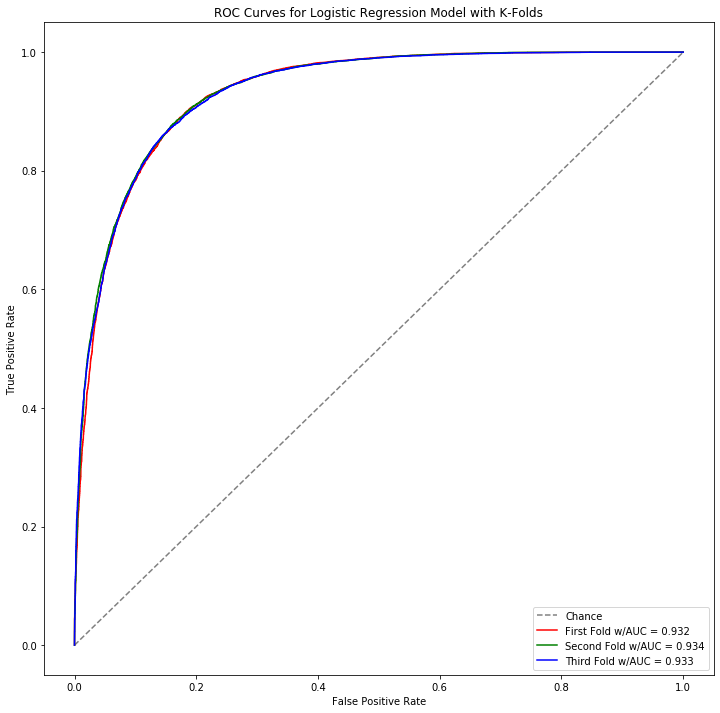


Part M:

We use crossvalidation to assess our model without using the testing data. By slicing off a part of the training data
we avoid any contamination with the test set, while also generalizing the model. This helps us to predict cost on an
independent dataset.


In [5]:
##########
# Part L #
##########

print("\nPart L:\n")

# Create arrays to hold the data
X_ = []; 
Y_ = []; 
Yhat_ = [];

# separate the data into 3 validation sets
skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(x_train, y_train):
    x_train_, x_test_ = x_train[train_index], x_train[test_index]    
    y_train_, y_test_ = y_train[train_index], y_train[test_index]

    # Initieate a randome weight
    weights = np.random.rand(3,1)
    # Use those weights to initiate the model
    model = LogisticRegression(weights)
    # Train the model of the training set. Still utilizing the Learning rate of 0.1
    model.train(x_train_, y_train_, epochs = 500, lr = 0.1)
    # Use the model to make predictions of the test set
    Yhat_.append(model.predict(x_test_))
    # Add those scores the to array
    X_.append(x_train_)
    Y_.append(y_test_)
    pass

# Calculate the ROCs from each of the three folds
fpr1, tpr1, thresholds1 = roc_curve(Y_[0],Yhat_[0], pos_label=1)  # ROC for Fold 1
fpr2, tpr2, thresholds2 = roc_curve(Y_[1],Yhat_[1], pos_label=1)  # ROC for Fold 2
fpr3, tpr3, thresholds3 = roc_curve(Y_[2],Yhat_[2], pos_label=1)  # ROC for Fold 3

# Calculate the Area under the curve for each fold
auc1 = metrics.roc_auc_score(Y_[0],Yhat_[0])                      # AUC for Fold 1
auc2 = metrics.roc_auc_score(Y_[1],Yhat_[1])                      # AUC for Fold 2
auc3 = metrics.roc_auc_score(Y_[2],Yhat_[2])                      # AUC for Fold 3

# define the size of the plot
plt.figure(figsize=(12, 12))

# Print a chance line
plt.plot([0,1],[0,1],'--', color='gray', label = 'Chance')

# Print the AUC for each Fold
legend_string1 = 'AUC = {:0.3f}'.format(auc1)                     # String to print AUC 1
legend_string2 = 'AUC = {:0.3f}'.format(auc2)                     # String to print AUC 2
legend_string3 = 'AUC = {:0.3f}'.format(auc3)                     # String to print AUC 3

# plot each Fold
plt.plot(fpr1, tpr1, c='r', label='First Fold w/' + legend_string1)
plt.plot(fpr2, tpr2, c='g', label='Second Fold w/' +legend_string2)
plt.plot(fpr3, tpr3, c='b', label='Third Fold w/' + legend_string3)

#plot titles and labels
plt.title("ROC Curves for Logistic Regression Model with K-Folds")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

##########
# Part M #
##########

print("\nPart M:\n")
print("We use crossvalidation to assess our model without using the testing data. By slicing off a part of the training data")
print("we avoid any contamination with the test set, while also generalizing the model. This helps us to predict cost on an")
print("independent dataset.")


Part N:



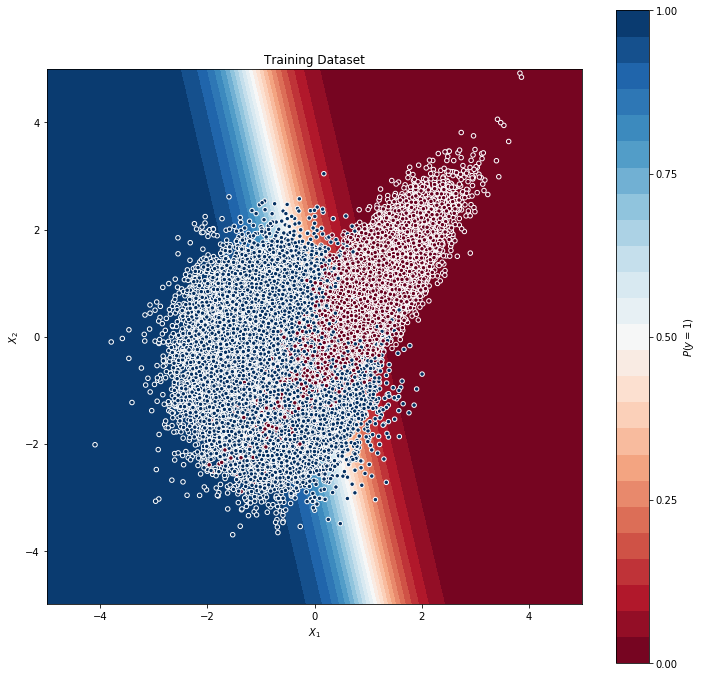

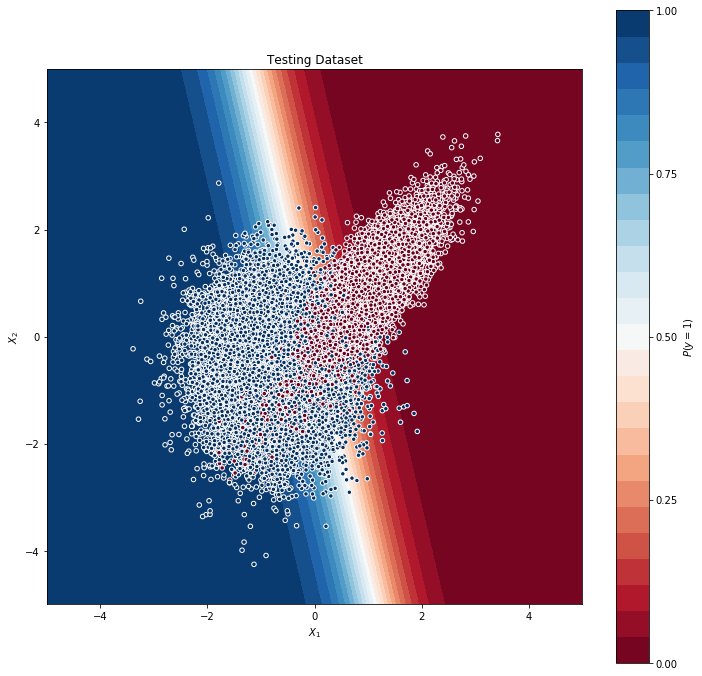


The boundry line is linear, which given the intermixing of the two classes near the origin leaves our classification
with something to be desired. The only way I could see improving the boundry would be 

Part O:



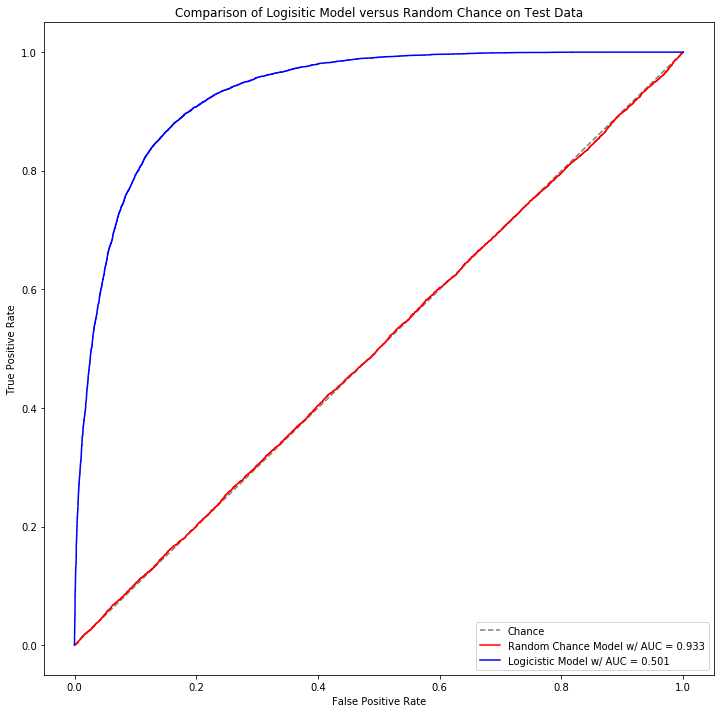

The Logistic model has an AUC of 0.933 and the Random Chance model has an AUC of 0.501.
This is a difference of 0.432, meaning that the logistic mode well outperformed the random chance model


In [6]:
##########
# Part N #
##########

print("\nPart N:\n")

#initiation of the boundrylines
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
ones = np.ones_like(xx).reshape(-1,1)
grid = np.c_[ones.ravel().reshape(-1,1), xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)]
probs = model.predict(grid).reshape(xx.shape[0],xx.shape[1])

# Plot for Testing data
f, ax = plt.subplots(figsize = (12, 12))                               # Setting the size of the plot
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(np.array(x_train[:,1]), np.array(x_train[:,2]), c = np.array(y_train), cmap="RdBu", s = 20, edgecolor='white' )
ax.set_title('Training Dataset')
ax = ax.set(aspect="equal", xlim=(-5, 5), ylim = (-5, 5), xlabel = "$X_1$", ylabel = "$X_2$") 

# Plot for training data
f, ax = plt.subplots(figsize=(12, 12))                                  # Setting the size of the plot
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(np.array(x_test[:,1]),np.array(x_test[:,2]),c=np.array(y_test), cmap="RdBu",s=20,edgecolor='white' )
ax.set_title('Testing Dataset')
ax = ax.set(aspect="equal", xlim=(-5, 5), ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")

plt.show()

print('\nThe boundry line is linear, which given the intermixing of the two classes near the origin leaves our classification')
print('with something to be desired. The only way I could see improving the boundry would be ')

##########
# Part 0 #
##########

print("\nPart O:\n")

# Logisitc Model
y_model = model.predict(x_test)                                     # train the Model
fp, tp, thresh  = (roc_curve(y_test,y_model, pos_label=1))          # Calculate the ROC
auc_model = auc(fp,tp)                                              # Calculate the AUC of the Model

# Random Model
y_random = np.random.rand(y_test.shape[0],1)                        # Train the model
fpr, tpr, threshr  = (roc_curve(y_test,y_random, pos_label=1))      # Calculate ROC
auc_random = auc(fpr,tpr)                                           # Calculate the AUC of the Model

# ROC Curves

# Print the AUC for each model
legend_string1 = 'AUC = {:0.3f}'.format(auc_model)                  # String to print AUC
legend_string2 = 'AUC = {:0.3f}'.format(auc_random)                 # String to print AUC

plt.figure(figsize=(12, 12))                                        # determine the size of the plot

# Print a chance line
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')

plt.plot(fpr,tpr,c= 'r', label = "Random Chance Model w/ " + legend_string1)
plt.plot(fp,tp,c= 'b', label = "Logicistic Model w/ " + legend_string2)
plt.legend(loc = 'lower right')                                     # Legend location
plt.title("Comparison of Logisitic Model versus Random Chance on Test Data")
plt.xlabel("False Positive Rate")                                   # X Axis
plt.ylabel("True Positive Rate")                                    # Y Axis
plt.show()                                                          # Plot the Graphs

aucdiff = auc_model - auc_random

print("The Logistic model has an AUC of {:.3f} and the Random Chance model has an AUC of {:.3f}.".format(auc_model, auc_random))
print("This is a difference of {:.3f}, meaning that the logistic mode well outperformed the random chance model".format(aucdiff))

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(e)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [7]:
# Part A: Constructing Dataset
# Source: https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python

#Working 
# mndata = MNIST('C:\\users\\derek\\Desktop\\MIDS Program\\_MIDs 2nd Semester\\Machine Learning\\Assignments\\Assignment_3\\_samples')
mndata = MNIST('_data\\_samples')

images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()

#convert data objects into numpy arrays
images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)

# Reshape each image array to 28*28
images_train = images_train.reshape(60000,28,28)
images_test = images_test.reshape(10000,28,28)

# Convert label binary where 3s are 1s and the rest are 0s (Working)
labels_train = np.where(labels_train == 3, 1, 0)
labels_test = np.where(labels_test == 3, 1, 0)

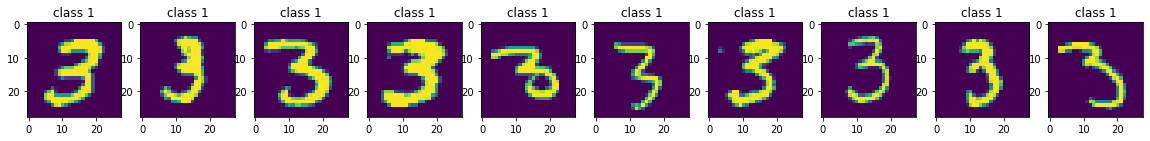

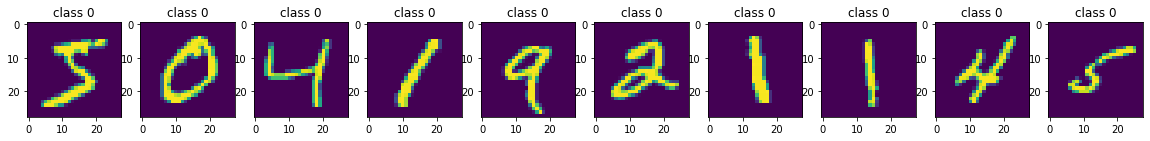

In [8]:
# Part B: 10 Examples of Each Class
# Joe Littell, MIDS 20 assisted me in developing these plots.

# 10 Examples of each 
train_image_1 = images_train[labels_train == 1][0:10]
train_image_0 = images_train[labels_train == 0][0:10]

# Also working 
fig1, axes1 = plt.subplots(1,10, figsize=(20,10))
fig2, axes2 = plt.subplots(1,10, figsize=(20,10))

# Class One Examples
for i in range(10):
    axes1[i].set_title('class {}'.format(1))
    axes1[i].imshow(train_image_1[i])

# Class Zero Examples
for i in range(10):
    axes2[i].set_title('class {}'.format(0))
    axes2[i].imshow(train_image_0[i])
    
plt.show()


Part C:
This dataset has: 53869 non threes and 6131 threes.


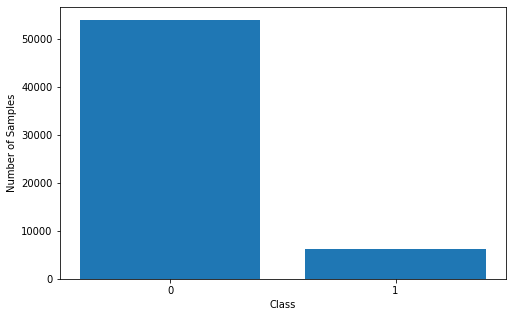

This shows an inbalance amoungst the classes which could lead to overfitting or inaccurate modeling.


In [9]:
print("\nPart C:")
print("This dataset has:", (labels_train.size - np.sum(labels_train)), "non threes and",np.sum(labels_train), "threes.")

plt.figure(figsize=(8, 5))
#plt.hist(lbl, align='mid')
hist = np.histogram(labels_train, bins=2)
plt.bar(np.array([0,1]),hist[0])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks([0,1])
plt.show()

print("This shows an inbalance amoungst the classes which could lead to overfitting or inaccurate modeling.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Part D.1/D.2: The grey line represents a random guess.


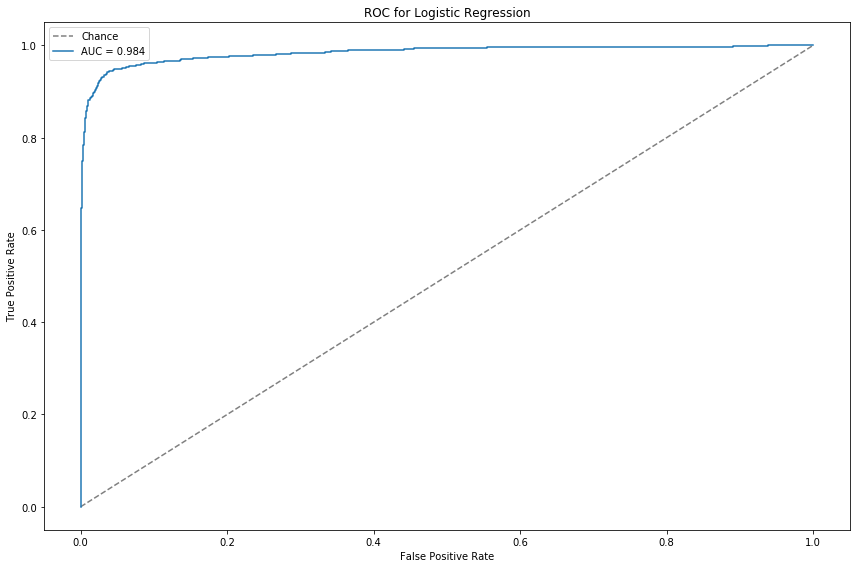

In [11]:
# Part D:
# Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the 
# class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. 
# Describe the algorithm's performance and explain any discrepancies you find.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(images_train, labels_train.reshape(-1,1))

for train_index, val_index in skf.split(X, y):
    # Extract the training and validation data for this fold
    X_train, X_val   = X[train_index], X[val_index]
    y_train          = y[train_index]
        
    # Train the classifier
    # X_train_features = preprocess_and_extract_features(X_train)
    clf              = logisticRegr.fit(images_train, labels_train.reshape(-1, 1))
        
    # Test the classifier on the validation data for this fold
    cpred            = logisticRegr.predict_proba(images_test.reshape(10000, 784))
        
    # Save the predictions for this fold
    prediction_scores[val_index] = cpred[:,1]
    
images_train = images_train.reshape(60000, 784) # Reshaping the images data to fit logistic regression
logisticRegr = LogisticRegression()

logisticRegr.fit(images_train, labels_train.reshape(-1, 1)) # The fit worked
predictions = logisticRegr.predict_proba(images_test.reshape(10000, 784)) # Got the predictions working

print("\nPart D.1/D.2: The grey line represents a random guess.")
plot_roc(labels_test,predictions[:,1])


Part D.1/D.2: Precision Recall Curve
Logistic: f1=0.891 auc=0.941


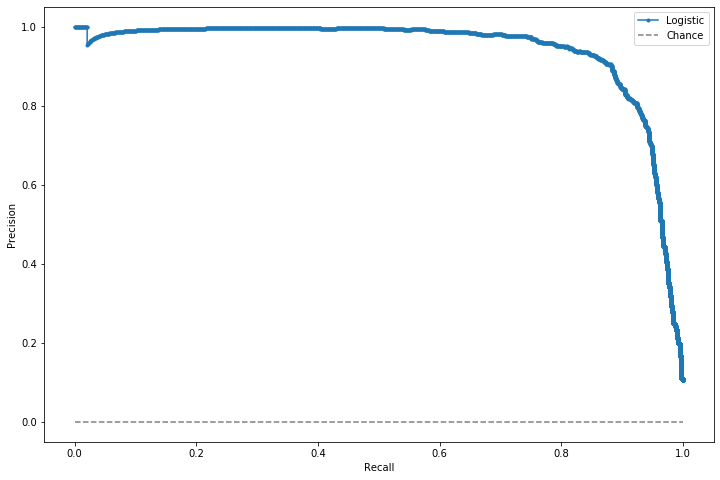

In [12]:
print("\nPart D.1/D.2: Precision Recall Curve")
yhat = logisticRegr.predict(images_test.reshape(10000, 784))

lr_precision, lr_recall, _ = precision_recall_curve(labels_test, predictions[:,1]) # Working
lr_f1, lr_auc = f1_score(labels_test, yhat), auc(lr_recall, lr_precision) # Working

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(labels_test[labels_test==1]) / len(labels_test)
plt.figure(figsize = (12,8))
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

plt.plot([0,1],[0,0],'--', color='gray', label='Chance')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWERS**


Part A: Plotting each class distribution


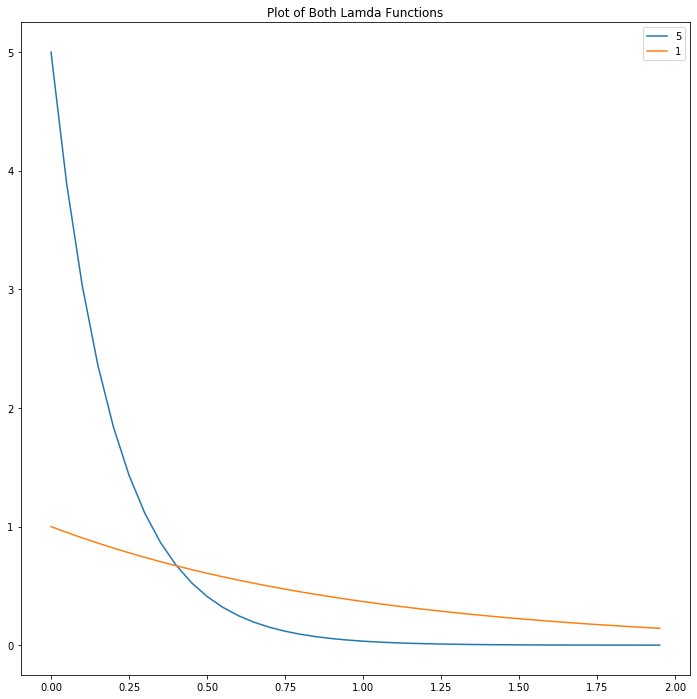

In [11]:
print("\nPart A: Plotting each class distribution")
from scipy.stats import expon

# Expon F(X)
def f(x,l=1):
    return l*np.exp(-l*x)

x = np.arange(0,2,0.05) # Creating the x values

plt.figure(figsize=(12,12))
plt.plot(x, f(x,5)) # Lamda f = 5
plt.plot(x,f(x)) # Lamda f = 1
plt.title("Plot of Both Lamda Functions")
plt.legend("51")

Part B: Providing the Bayes Decision Rule in $x > x^*$, then predict Class 0, otherwise predict Class 1

$P(x|C_i) = \lambda_i e^{-\lambda_i x}$

$P(x|C_0) = P(x|C_1) = 0.5$

$P(x|C_0)/P(x|C_1) > P(C_1)/P(C_0)$

$P(x|C_0)/P(x|C_1) > 1$

$e^{-x} / 5e^{-5x} > 1$

Resulting in a decision boundary of 0.403

Part C: The decision boundary of 0.403 derived in Part B, this is the intercetion of the two graphs from Part A.

In [12]:
# Part D: 
dec_bound = .403
a3_test_df = pd.read_csv('_data\\A3_Q3_test.csv')

# Adding a column of predicted values
a3_predict = a3_test_df.copy()
a3_predict['predicted'] = np.where(a3_predict['x'] >= dec_bound, 0, 1) 

# Seeing if the the guess matches actual. 
a3_predict['c_guess'] = np.where(a3_predict['y'] == a3_predict['predicted'], 1, 0) 

# Calculating the rate
accuracy_score = np.sum(a3_predict['c_guess'])/len(a3_predict)

# Printing the error rate
print('Part D: I used a X value of 0.403 for that decision boundary this resulted in a {:.3f} error rate'.format(1-accuracy_score))

Part D: I used a X value of 0.403 for that decision boundary this resulted in a 0.234 error rate


In [2]:
# Part E: Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Loading the data for A3
a3_train_df = pd.read_csv('_data\\A3_Q3_train.csv')

# Splitting the data
X = a3_train_df['x']
y = a3_train_df['y']

# Converting to Numpy
X = X.to_numpy()
y = y.to_numpy()

# Reshaping 
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

logisticRegr = LogisticRegression()

# Fiting the model
logisticRegr.fit(X,y)

# Predicting the y
predictions_2 = logisticRegr.predict(X) # Got the predictions working

# Accuracy Score
acc_score = logisticRegr.score(y, predictions_2)

# Misclassification Score
print('Part E: I used a standard logistic regression and it had a {:.3f} misclassification rate'.format(acc_score))
print('This is the exact same as the Bayes Classifier.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Part E: I used a standard logistic regression and it had a 0.234 misclassification rate
This is the exact same as the Bayes Classifier.


Part F:
To compute this, extract the parameters fromyour fit model (look for the coef_ and intercept_ attributes) and since the classes are balanced, the
decision rule will be to classify a sample as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

The decision rule will be to classify as Class 1 if > 0.5. We can compute these values directly by:

In [ ]:
w_0 = logisticRegr.intercept_[0]
w_1 = logisticRegr.coef_[0][0]
print('w0 = {}'.format(w_0))
print('w1 = {}'.format(w_1))
print('x > {}'.format(-w_0/w_1))

Part G:
The decision rule would change. The described change in prior probabilities would make Class 1 more likely for a larger array of values thereby moving the decision boundary further in the direction of positive x-values.

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

Source: <br>
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f <br>
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ <br>
https://www.kaggle.com/benhamner/2016-us-election#county_facts_dictionary.csv

**ANSWERS**

4.A: Identifying a Machine Learning Question <br>
For this question I chose to look at county wide demographics and election results in 2016 to see if demographics change voting patterns. I found this topic particularly interesting because it is an important election year for our country. Especially in the wake of the impeachment and the Democratic Primary, it is important to be able to identify voting patterns of various groups.

4.B: Loading in and Merging the Data

In [20]:
# Part B: Loading in and Merging the Data
# Note, the analysis only looked at the 2016 Election and did not include 3rd Party Candidates

demographics_df = pd.read_csv('county_facts_no_states_v2.csv')
voting_df = pd.read_csv('countypres_2000-2016_edited_pre_python_v3.csv')

# Completing the merge
analysis_df_v1 = pd.merge(demographics_df, voting_df, on = 'fips', how = 'left', indicator = False)

# Fixing string values in the response variable.
analysis_df_v1["winning_cand_percentage"] = pd.to_numeric(analysis_df_v1["winning_cand_percentage"], errors ='coerce')

4.C: <br>
For my project I wanted to predict the winning candidate percentage (winning_cand_percentage) using demographic data. 
At the onset, there were two separate datasets one for county demographics in 2014 and the other on election results by county for 2000-16.  

Because of this, the data did require a lot of preprocessing, most of which was done in excel. I first cut the elections data frame to just 2016, and I combined several of the rows of the data into one (so that each county was one row containing the complete results for the 2016 election). 

This resulted in rows that had total Republican/Democrat votes, State, FIPS (county code) and total votes. I then created a hybrid metric which determined, by county, the percentage of the vote the winning candidate had. If the value was negative that meant that Hilary Clinton had won that county, and if it was positive, that meant a victory for Donald Trump.  

I then went through a similar process with the demographic data by county. Shrinking from 54 predictors to 24 that all primarily focused on age of the area, population density, household income, and racial makeup. 

After which I merged the two datasets based on the FIPS code and began my analysis.


 Note: Several transformations were attempted but they were unsuccessful. Ultimately there was no significant deviations from the assumptions of Linear Regression

 Linear Model Assumptions: Linearity, Independence of Errors, Equal Variance, and Normality


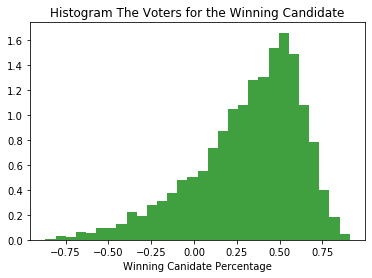

In [21]:
# Important command analysis_df_v1.columns.to_list()
print("\n Note: Several transformations were attempted but they were unsuccessful. Ultimately there was no significant deviations from the assumptions of Linear Regression")
print("\n Linear Model Assumptions: Linearity, Independence of Errors, Equal Variance, and Normality")

# Plotting a histogram of the response video "winning_cand_percentage"
n, bins, patches = plt.hist(analysis_df_v1["winning_cand_percentage"], 30, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Winning Canidate Percentage')
plt.title('Histogram The Voters for the Winning Candidate')
plt.show()

4.D:<br>
Based on my EDA I chose to use Linear Regression, one because it will give a specific victory margin, and two it allows for inference on how much things like median income and population density effect voting. 

In [22]:
# Building the model
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

varibles_1='winning_cand_percentage~C(state_abbreviation)+population_14+p_under18+p_over65+p_female+p_white+p_black+p_nAmerican+p_asian+p_pacificIsland+p_latino+p_foreignBorn+p_NotEnglish+p_highSchool+p_bachelors+p_vets+p_homeOwnership+p_multiStructures+person_per_house+median_hh_income+p_below_pov+pop_per_mile'           

In [23]:
# Part E: Building the model with sklearn.

# Making sure there are no missing values in the DF
analysis_df_v2 = pd.DataFrame(analysis_df_v1).fillna(0)

# Changing state variblaes to categorical
analysis_df_v2['state_abbreviation']=pd.get_dummies(analysis_df_v1['state_abbreviation'])

# Fitting on the entire dataset
X = analysis_df_v2[['state_abbreviation',"population_14",'p_under18','p_over65','p_female','p_white','p_black','p_nAmerican','p_asian','p_pacificIsland','p_latino',
                'p_foreignBorn','p_NotEnglish','p_highSchool','p_bachelors','p_vets','p_homeOwnership','p_multiStructures','person_per_house',
               'median_hh_income', 'p_below_pov']].values

y = analysis_df_v2['winning_cand_percentage'].values

regressor = LinearRegression()  
regressor.fit(X, y)
print('The original model resulted in an R^2 of:', regressor.score(X,y))

The original model resulted in an R^2 of: 0.6977220560803653


Part E:<br>
The model preformed well, with an $R2$ of 0.698. Meaning that the predicted values closely match the real life response variable.

Part F: Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it. <br>
For this problem I chose to use train and test split because it allowed for a hold out set of unseeen data to compare the model to. 

In [24]:
# Part G: Running analysis and showing performance. 

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Fitting
regressor.fit(X_train, y_train)

# Predicting
y_pred = regressor.predict(X_test)

# Actual vs predicted by county
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
0,0.234572,0.359107
1,0.194420,0.082744
2,0.846690,0.598101
3,0.267769,0.378117
4,0.600132,0.430264


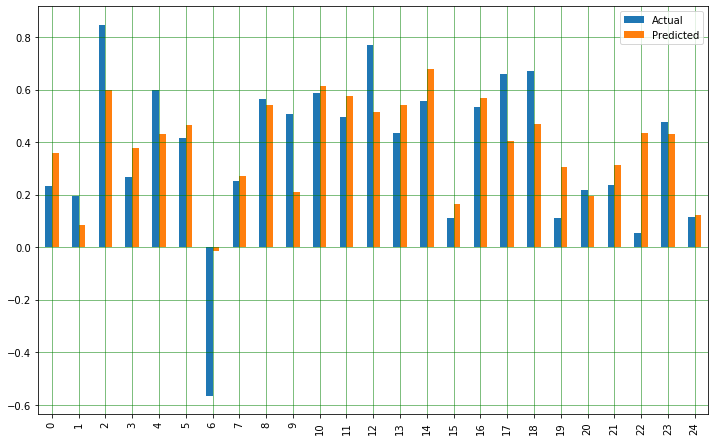

In [25]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,7.5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [26]:
metrics.r2_score(y_test, y_pred) # 0.0.6923

0.6922920074372811

Part G: Doing a train and test split slightly decreased the model performance, with a final $R2$ value of 0.692. Meaning that the predicted values decently match the real world results, especially considering that this is social studies data. 

Part H: Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work.

Overall the model preformed well, scoring an R2 of 0.856 on the full dataset (results below), but the main advantage of using linear models is its interpretability. Which becomes especially clear when I use Statsmodels to print out a summary after I ran the updated model on the full dataset. This gave me a granular view into voting patterns by state and demographics. 

For example, being in Maine alone increasing the percentage of voting Democrat by 42% while being in Texas increases the percentage of Republican voters by 23%. There are also several other interesting trends as well. For example, for each percentage point of the population is below the poverty line, that increases the percent of Democratic Votes by 0.56% but as the percentage of whites as a percentage of the population goes up it increases the Republicans by 0.85%.

However one weakness of this model is it only looks at the 2016 election and is probably not very generalizable because Trump is such a unique figure. Further work would probably focusing on models that are centered on Congressional and Senate races as well as Presidential ones to see if that effects voting patterns. 

Full model summary below.

In [27]:
# Statsmodels Code
# Running the first model on both train and test data.
q4_model_1 = smf.ols(varibles_1, data = analysis_df_v1).fit()
print(q4_model_1.summary())

                               OLS Regression Results                              
Dep. Variable:     winning_cand_percentage   R-squared:                       0.856
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                     255.2
Date:                     Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                             08:33:17   Log-Likelihood:                 2267.6
No. Observations:                     3115   AIC:                            -4391.
Df Residuals:                         3043   BIC:                            -3956.
Df Model:                               71                                         
Covariance Type:                 nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------